In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
book_club = pd.read_csv("C:/Users/seanw/Book_Club/Book Club - Ratings.csv")
book_club["Meeting"] = pd.to_datetime(book_club["Meeting"], format="%m/%d/%Y")
book_club.set_index(["Season", "Meeting", "Book"], inplace=True)
book_club.drop(["Search Key", "Goodreads Search", "Audible Search"], axis=1, inplace=True)

In [3]:
book_club.head()

Suggestor  James  \
Season       Meeting    Book                                                    
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?     Group    5.5   
             2019-07-01 The Call of Cthulhu                      Group    4.0   
                        Guards! Guards!                          Group    5.0   
             2019-07-31 Blood Meridian                            Phil    6.5   
             2019-09-15 The Blade Itself                          Matt    5.7   

                                                              Matt  Phil  \
Season       Meeting    Book                                               
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?   5.0   6.0   
             2019-07-01 The Call of Cthulhu                    4.0   2.5   
                        Guards! Guards!                        1.0   5.7   
             2019-07-31 Blood Meridian                         6.0   6.4   
             2019-09-15 The Blade Itself                       6.5   NaN   

                                                              Ryan  Sean  \
Season       Meeting    Book                                               
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?   5.0   4.6   
             2019-07-01 The Call of Cthulhu                    2.0   1.7   
                        Guards! Guards!                        5.5   5.3   
             2019-07-31 Blood Meridian                         NaN   4.3   
             2019-09-15 The Blade Itself                       NaN   6.3   

                                                              Kyle  \
Season       Meeting    Book                                         
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?   NaN   
             2019-07-01 The Call of Cthulhu                    NaN   
                        Guards! Guards!                        NaN   
             2019-07-31 Blood Meridian                         NaN   
             2019-09-15 The Blade Itself                       NaN   

                                                                                                      Goodreads  \
Season       Meeting    Book                                                                                      
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?  https://www.goodreads.com/book/show/36402034-d...   
             2019-07-01 The Call of Cthulhu                   https://www.goodreads.com/book/show/15730101-t...   
                        Guards! Guards!                       https://www.goodreads.com/book/show/64216.Guar...   
             2019-07-31 Blood Meridian                        https://www.goodreads.com/book/show/394535.Blo...   
             2019-09-15 The Blade Itself                      https://www.goodreads.com/book/show/944073.The...   

                                                                                                        Audible  
Season       Meeting    Book                                                                                     
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?  https://www.audible.com/pd/Blade-Runner-Audiob...  
             2019-07-01 The Call of Cthulhu                   https://www.audible.com/pd/The-Call-of-Cthulhu...  
                        Guards! Guards!                       https://www.audible.com/pd/Guards-Guards-Audio...  
             2019-07-31 Blood Meridian                        https://www.audible.com/pd/Blood-Meridian-Audi...  
             2019-09-15 The Blade Itself                      https://www.audible.com/pd/The-Blade-Itself-Au...

In [4]:
ratings = book_club[["Suggestor", "James", "Matt", "Phil", "Ryan", "Sean", "Kyle"]]
ratings.head()

Suggestor  James  \
Season       Meeting    Book                                                    
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?     Group    5.5   
             2019-07-01 The Call of Cthulhu                      Group    4.0   
                        Guards! Guards!                          Group    5.0   
             2019-07-31 Blood Meridian                            Phil    6.5   
             2019-09-15 The Blade Itself                          Matt    5.7   

                                                              Matt  Phil  \
Season       Meeting    Book                                               
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?   5.0   6.0   
             2019-07-01 The Call of Cthulhu                    4.0   2.5   
                        Guards! Guards!                        1.0   5.7   
             2019-07-31 Blood Meridian                         6.0   6.4   
             2019-09-15 The Blade Itself                       6.5   NaN   

                                                              Ryan  Sean  Kyle  
Season       Meeting    Book                                                    
The Codpiece 2019-06-05 Do Androids Dream of Electric Sheep?   5.0   4.6   NaN  
             2019-07-01 The Call of Cthulhu                    2.0   1.7   NaN  
                        Guards! Guards!                        5.5   5.3   NaN  
             2019-07-31 Blood Meridian                         NaN   4.3   NaN  
             2019-09-15 The Blade Itself                       NaN   6.3   NaN

In [5]:
ratings.query("Suggestor == 'James'").drop("Suggestor", axis=1).mean()

James    5.750000
Matt     3.925000
Phil     4.787500
Ryan     4.500000
Sean     5.057143
Kyle     4.050000
dtype: float64

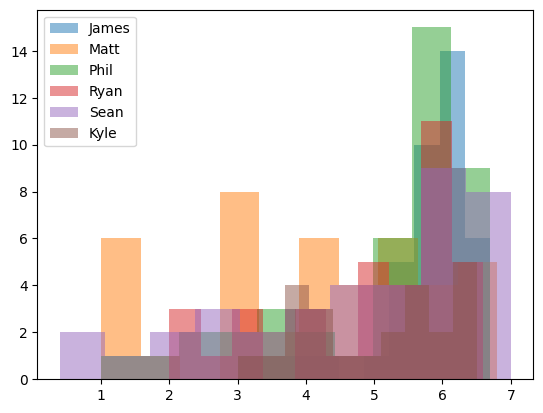

In [16]:
for col in ratings.drop("Suggestor", axis=1).columns:
    plt.hist(ratings[col], alpha=.5, label=col)
plt.legend()
plt.show()

In [19]:
book_club.to_pickle("book_club.pkl")